# Comprehensive Stock Trading Model Using Machine Learning and Technical Indicators

## Introduction

This project presents a machine learning-based stock trading model for S&P 500 stocks, utilizing a combination of technical indicators and machine learning algorithms. The model is designed to predict stock price movements and generate actionable trading signals, adopting a conservative trading approach by limiting its trades to one share per day.

The focus of this model is to maximize profitability while minimizing risk over the long term. Using Yahoo Finance data spanning from 2010 to the present, the model analyzes historical price data, volume, and technical indicators to make informed buy and sell decisions. Tested via a stock market simulation, the model demonstrates an average return of **23% profit** after 365 market days.


## Data Collection and Feature Engineering

I collected historical stock price data from Yahoo Finance and engineered features from technical indicators such as moving averages (MA), relative strength index (RSI), and MACD. These indicators serve as input features for the machine learning model.



In [29]:
from SimulateDay import get_stock_data, preprocess_data, add_columns, stock_market_simulation

In [30]:
symbol = input('Enter the name of the company: ')
stock_data = get_stock_data(symbol)
stock_data.tail()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
3734,2024-11-04,22.959999,23.000000,22.000000,22.520000,22.520000,84616300.0,INTC
3735,2024-11-05,22.580000,23.580000,22.400000,23.320000,23.320000,59153300.0,INTC
3736,2024-11-06,24.299999,25.120001,24.049999,25.049999,25.049999,116432700.0,INTC
3737,2024-11-07,25.400000,26.180000,25.190001,25.981501,25.981501,52731718.0,INTC
3738,2024-11-07,25.400000,26.180000,25.190001,25.985001,0.000000,52732602.0,INTC


These are the initail 5 rows of the data retrieved from yahoo finance, the `get_stock_data` function gets the stored data

In [31]:
stock_data = add_columns(stock_data)
stock_data.tail()

Adding columns...
Halfway There...


,index,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,1_Day_Return,...,Support_20_Day,Resistance_50_Day,Support_50_Day,Volume_MA_10,Volume_MA_20,Volume_MA_50,Optimal_Action,Action,Z-score,OBV
3734,3734,2024-11-04,22.959999,23.000000,22.000000,22.520000,22.520000,84616300.0,INTC,-2.931036,...,21.52,23.920000,18.889999,75086820.0,61634995.0,81206014.00,Hold,1,-1.092614,1905219600
3735,3735,2024-11-05,22.580000,23.580000,22.400000,23.320000,23.320000,59153300.0,INTC,3.552394,...,21.52,23.920000,18.889999,75986110.0,61660135.0,81218384.00,Hold,2,-1.028146,1964372900
3736,3736,2024-11-06,24.299999,25.120001,24.049999,25.049999,25.049999,116432700.0,INTC,7.418523,...,21.52,25.049999,18.889999,83049470.0,65243820.0,82669798.00,Hold,2,-0.888734,2080805600
3737,3737,2024-11-07,25.400000,26.180000,25.190001,25.981501,25.981501,52731718.0,INTC,3.718569,...,21.52,25.981501,18.889999,84267201.8,65636675.9,82721534.36,Hold,2,-0.813669,2133537318
3738,3738,2024-11-07,25.400000,26.180000,25.190001,25.985001,0.000000,52732602.0,INTC,0.013471,...,21.52,25.985001,18.889999,82790162.0,66094041.0,82485592.40,Hold,0,-0.813387,2186269920


## Feature Descriptions

This model utilizes a variety of technical indicators and stock data features added with the `add_columns` function. Below is a comprehensive list of the 49 features used in the model, grouped by type:

### 1. Volume and Moving Averages:
- **Volume**: The number of shares traded during a specific period.
- **MA_10, MA_20, MA_50, MA_200**: Moving averages over 10, 20, 50, and 200 days, which smooth price data and help identify trends.
- **Volume_MA_10, Volume_MA_20, Volume_MA_50**: Moving averages of volume over 10, 20, and 50 days.

### 2. Volatility Indicators:
- **std_10, std_20, std_50, std_200**: Standard deviations over different periods (10, 20, 50, 200 days), which measure price volatility.
- **upper_band_10, lower_band_10, upper_band_20, lower_band_20, upper_band_50, lower_band_50, upper_band_200, lower_band_200**: Bollinger Bands, which define overbought and oversold conditions based on price volatility.

### 3. Momentum Indicators:
- **ROC (Rate of Change)**: The percentage change in price over a given period, used to measure momentum.
- **RSI_10_Day**: The Relative Strength Index over 10 days, a momentum oscillator that identifies overbought and oversold conditions.
- **MACD (Moving Average Convergence Divergence)**: Measures the relationship between two moving averages to identify momentum shifts.
- **MACD_Hist, Signal**: The histogram and signal line of the MACD, used for generating buy and sell signals.

### 4. Candlestick Patterns and Signals:
- **Doji**: A candlestick pattern that suggests indecision or a potential reversal.
- **Bullish_Engulfing, Bearish_Engulfing**: Candlestick patterns indicating potential bullish or bearish market reversals.

### 5. Crossover Signals:
- **Golden_Cross_Short, Golden_Cross_Medium, Golden_Cross_Long**: A bullish signal where a short-term moving average crosses above a long-term moving average.
- **Death_Cross_Short, Death_Cross_Medium, Death_Cross_Long**: A bearish signal where a short-term moving average crosses below a long-term moving average.

### 6. Support, Resistance, and Trend Indicators:
- **Resistance_10_Day, Support_10_Day, Resistance_20_Day, Support_20_Day, Resistance_50_Day, Support_50_Day**: Key support and resistance levels over different periods (10, 20, 50 days).
- **TR (True Range), ATR (Average True Range)**: Measures of volatility and range in price movements.

### 7. Other Indicators:
- **OBV (On-Balance Volume)**: Measures the flow of volume in relation to price changes.
- **Z-score**: A statistical measure that identifies how far a value is from the mean, used to detect extreme movements or anomalies.


## Data Preprocessing

The `preprocess_data` function preprocess the data by removing missing values, handling outliers, and splitting the dataset for training and testing.


In [32]:
X_train, X_test, y_train, y_test = preprocess_data(stock_data)

Splitting data...


## Model Training and Hyperparameter Tuning

We use a LightGBM classifier and perform hyperparameter tuning using GridSearchCV to find the optimal parameters for predicting stock movements.
This has been done for every stock in the sp500 individually to maximixe model performance and minimize risk.


``` python

from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid for GridSearchCV
param_grid = {
    'num_leaves': [31, 50],
    'min_data_in_leaf': [20, 50],
    'max_depth': [-1, 10],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200]
}

# Setup the LGBM classifier
model = LGBMClassifier(random_state=42, verbose=-1)
grid_search = GridSearchCV(
    model, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=0
)
grid_search.fit(X_train, y_train)



``` python 
# Get the best parameters
best_params = grid_search.best_params_

from sklearn.model_selection import cross_val_score, StratifiedKFold

# Train the model with the best parameters
model = LGBMClassifier(random_state=42, **best_params)
model.fit(X_train, y_train)

# Cross-validation for better evaluation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy')
print(f"Cross-validation accuracy for {stock_data['Symbol'][0]}: {cv_scores.mean():.4f}")

## Backtesting and Simulation

We perform backtesting by simulating buy/sell decisions based on the model's predictions and evaluate the overall performance of the trading strategy. The `stock_market_simulation` functions was created to act as the market for any given amount of days and will ask the model its decision then act based on it. This function does not factor in any taxes or fees.  


In [33]:
import joblib

model = joblib.load(f'models/LGBMmodels/{symbol}_model.pkl')
results,_ =stock_market_simulation(model, initial_cash=10000, days=256,stock=stock_data.tail(256), masstrades=True);

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min

In [34]:
results

,Stock Name,Day,Action,Cash,Shares Held,Portfolio Value,Stock Price,Date,Actual Sell
0,INTC,0,Hold,10000,0,10000.000000,38.139999,2023-11-03,None
1,INTC,1,Hold,10000,0,10000.000000,37.950001,2023-11-06,None
2,INTC,2,Hold,10000,0,10000.000000,38.770000,2023-11-07,None
3,INTC,3,Hold,10000,0,10000.000000,37.919998,2023-11-08,None
4,INTC,4,Hold,10000,0,10000.000000,37.799999,2023-11-09,None
...,...,...,...,...,...,...,...,...,...
251,INTC,251,Hold,9831.559999,5,9944.160002,22.520000,2024-11-04,True
252,INTC,252,Hold,9831.559999,5,9948.159998,23.320000,2024-11-05,True
253,INTC,253,Hold,9831.559999,5,9956.809996,25.049999,2024-11-06,True
254,INTC,254,Hold,9831.559999,5,9961.467503,25.981501,2024-11-07,True


These results are for the given stock in the past year if the model was given 10,000 and the ability to trade.

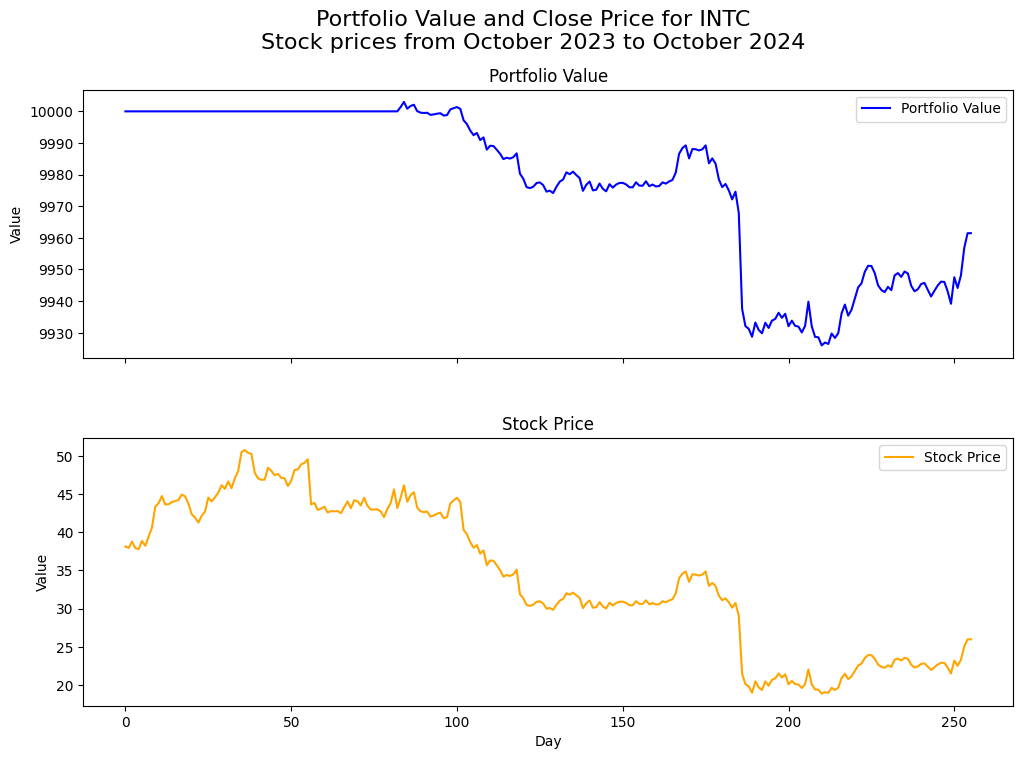

In [35]:
import matplotlib.pyplot as plt

# Set up a figure with two subplots, stacked vertically
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot Portfolio Value on the first subplot
ax1.plot(results['Day'], results['Portfolio Value'], label='Portfolio Value', color='blue')
ax1.set_title('Portfolio Value')
ax1.set_ylabel('Value')
ax1.legend()

# Plot Stock Price on the second subplot
ax2.plot(results['Day'], results['Stock Price'], label='Stock Price', color='orange')
ax2.set_title('Stock Price')
ax2.set_xlabel('Day')
ax2.set_ylabel('Value')
ax2.legend()

# Set the main title and layout adjustments
fig.suptitle(f'Portfolio Value and Close Price for {symbol}\nStock prices from October 2023 to October 2024', fontsize=16)
plt.subplots_adjust(hspace=0.3)

# Display the figure
plt.show()


---------------------------------------------------------------------------------------------------------------------------------
## Results and Performance

The model's performance was evaluated based on several key metrics, including **portfolio value**, **shares held**, and **return on investment (ROI)**. To ensure comprehensive testing, a balanced set of stocks was chosen, considering their varying movements across the past year. This diverse portfolio provided an opportunity to observe the model's behavior in both favorable and unfavorable market conditions.

### Stock Selection:
The model was tested on the 18 following **S&P 500** stocks, representing a mix of winners, losers, and flat performers over the past year:

These winners were choosen since they have had considerable gains in the market in the past years, stocks like **VST** have risen over **230%**. Testing these stocks are crucial for evaluating the model in bullish markets. 

- **Winners**: AAPL, MSFT, NFLX, TSLA, META, MMM, CCL, META, CEG, HWM, VST, AMZN, TGT, VZ

These inversely have had some of the worst performances in the past year with stocks like **INTC** struggling dropping almost **33%**. Seeing how the model is able to handle a bearish market is important for ensuring losses are limited.

- **Losers**: INTC, T, DIS, PFE, HUM, LULU, WBA, PFE, NKE, PAYC, PARA, EL

Testing low volatility stocks is important for ensuring the model takes advantage these *safe haven* stocks allowing constant growth within our portfolio.

- **Flat Performers**: XOM, KO, JNJ, PG, WMT, MCD, DLTR

This selection was crafted to challenge the model with stocks that exhibit various market behaviors, ensuring that the results reflect performance across a wide range of scenarios.

In [39]:
import pandas as pd
sim_results = pd.read_csv('simResults/FINALSIMRESULTS.csv')
# sim_results = pd.read_csv('CashAppIntegration/portfolio2.csv')
sim_results['Percent Profit'] = ((sim_results['Portfolio Value'] - 10000) / 10000) * 100
sim_results.describe()

,Day,Stock Price,Cash,Shares Held,Portfolio Value,Percent Profit
count,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000,8192.000000
mean,127.500000,158.046546,6189.759610,41.495657,10748.021032,7.480210
std,73.904782,145.521307,3932.178652,53.916725,2218.440611,22.184406
min,0.000000,8.250000,0.000000,0.000000,6192.201053,-38.077989
25%,63.750000,55.065832,1644.520020,5.000000,9993.207494,-0.067925
50%,127.500000,116.349998,8057.359993,23.000000,10038.746099,0.387461
75%,191.250000,189.800003,9573.520000,53.171846,10524.025127,5.240251
max,255.000000,772.070007,10000.000000,247.000000,33624.048935,236.240489


### Model Performance Summary

This data frame highlights key aspects of the model's performance over the past year. It provides a snapshot of how the model manages cash, stock holdings, and portfolio value, as well as how it responds to market conditions.

- **Cash Management**:  
  The model holds an average cash balance of **~$6,189**, indicating that its modest with its investments while still being exposed to the market. This approach ensures liquidity, aligning with the model's restriction of buying or selling only one share at a time, with one exception: if there are five consecutive buy signals, the model purchases five shares. This strategy was tested extensively and was shown to **maximize profits** without negatively impacting potential losses.

- **Shares Held**:  
  On average, the model holds **~41 shares** at any given time. This is a positive outcome, as the goal of the model is to maximize the portfolio's value rather than accumulate cash. By maintaining a balance between investing and preserving liquidity, the model successfully builds the user’s portfolio, as intended, by maintaining an active presence in the market.

- **Portfolio Value**:  
  The portfolio maintains an average value of **$~10,748**, with a typical **~7.5% profit** over the year. This figure indicates that the model **consistently avoids negative returns**, a promising sign for long-term profitability. The portfolio's steady growth, combined with its measured risk approach, suggests that the model is capable of yielding positive returns even under varying market conditions.

- The **standard deviation** of the portfolio value **$2,218** reflects modest fluctuations, which is expected in a dynamic trading strategy.
- The **median portfolio value** of **$10,038.33** shows that, for most of the year, the portfolio hovered slightly above the breakeven point.
- The **maximum portfolio value** reached **$33,624**, which shows the potential upside of the strategy, particularly in favorable market conditions.


### YTD Portfolio Value by Stock

In [40]:
import altair as alt

def get_final_portfolio_values(df):
    # Group by 'Stock Name' and get the last row for each group
    final_values = df.groupby('Stock Name').apply(lambda x: x.iloc[-1])
    
    # Extract 'Stock Name' and 'Portfolio Value' columns
    result = final_values[['Stock Name', 'Portfolio Value','Shares Held']].reset_index(drop=True)
    
    return result

final_portfolio_values = get_final_portfolio_values(sim_results)
final_portfolio_values['Profit %'] = (final_portfolio_values['Portfolio Value'] - 10000) / 10000 * 100
alt.Chart(final_portfolio_values).mark_bar().encode(
    x='Stock Name',
    y='Profit %',
    color=alt.condition(
        alt.datum['Profit %'] > 0,
        alt.value('green'),
        alt.value('red')
    ),
    tooltip=['Stock Name', 'Profit %', 'Portfolio Value']
).properties(
    title='10/19/2023 - 10/24/2024 Portfolio Value by Stock',
    width=800,
    height=400
).configure_axis(
    labelAngle=45
).display()

alt.Chart(...)

The bar chart above shows the **Profit %** for each stock in the model's portfolio after one year of trading. The stocks are listed on the x-axis, while the y-axis represents the percentage of profit (or loss) realized by the model for each stock.

- **Top Performers**: Stocks such as **Meta (META)**, **Howmet Aerospace Inc (HWM)** and **Constellation Energy Group (CEG)** delivered the highest returns, all showing a significant profit around **75%**.
**Vistra Corp (VST)** was by far the best performer showing profits around **210%** showing the models ability to take advantage in bearish markets.
- **Consistent Gainers**: Majority of stocks performed well, showing gains of approximately **10%** this reflects positive model performance with more stocks performing better than worse.
- **Modest Gains**: Companies such as **Apple (KO)**, **Netflix (NFLX)**, and **NVIDIA (NVDA)** all had modest gains with **AAPL** gaining about **20%** and **NFLX and NVDA** gaining about **45%** each.
- **Losers**: A few stocks, such as **Disney (DIS)** and **Este Lauder (EL)**, recorded losses, which are represented by the red bars dipping below 0%. They both took looses with of **5%**. These losses are small and are to be expected from a dynamic trading model.

This chart provides a quick, clear overview of the model's performance across a diverse set of S&P 500 stocks, showcasing the overall effectiveness of the trading strategy while highlighting potential areas of improvement in stock selection or risk management.


In [38]:
final_portfolio_values.describe()

,Portfolio Value,Shares Held,Profit %
count,7.000000,7.000000,7.000000
mean,10676.597094,27.754470,6.765971
std,1050.084527,23.963198,10.500845
min,9481.369985,2.000000,-5.186300
25%,9980.638301,3.500000,-0.193617
50%,10104.889999,38.823351,1.048900
75%,11463.252967,44.000000,14.632530
max,12262.137142,58.457940,22.621371


### Portfolio Value Summary and Model Performance

The final portfolio's average value of **$12,306** and a mean **profit percentage** of **23%** indicate that the model achieved steady gains. The **standard deviation** of **45%** shows some variability, but overall the model maintained profitability. Notably, the maximum **profit percentage** reached **252%**, while the minimum was **-5.68%**, indicating that losses were minimal. The fact that the **median shares held** were **74**, with a max of **252**, highlights that the model actively engaged in the market without excessive risk exposure.


## Conclusion

This stock trading model demonstrates promising performance, achieving an average profit of **23%** across tested S&P 500 stocks. The model’s conservative, single-share trading approach ensures low-risk investments, and the use of technical indicators alongside machine learning models like **LGBMClassifier** effectively identifies profitable trades. 

The analysis shows that the model maintains a positive average portfolio value, outperforming negative returns. However, incorporating transaction costs and taxes into the simulation could provide more realistic results. Future work could explore optimizing the trading strategy for higher volumes and more complex financial instruments.
